In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_trivy import create_df

In [2]:
df= create_df()
print(df)

          VulnerabilityID     PkgName        Status Severity  \
0           CVE-2011-3374         apt      affected      LOW   
1     TEMP-0841856-B18BAF        bash      affected      LOW   
2           CVE-2016-2781   coreutils  will_not_fix      LOW   
3          CVE-2017-18018   coreutils      affected      LOW   
4           CVE-2024-2398        curl      affected     HIGH   
...                   ...         ...           ...      ...   
1919        CVE-2005-2541         tar      affected      LOW   
1920  TEMP-0290435-0B57B5         tar      affected      LOW   
1921       CVE-2024-28085  util-linux         fixed     HIGH   
1922        CVE-2022-0563  util-linux      affected      LOW   
1923       CVE-2021-31879        wget      affected   MEDIUM   

                              Container  
0     jsons/grype/sboms/nginx_sbom.json  
1     jsons/grype/sboms/nginx_sbom.json  
2     jsons/grype/sboms/nginx_sbom.json  
3     jsons/grype/sboms/nginx_sbom.json  
4     jsons/grype/sbo

<Axes: >

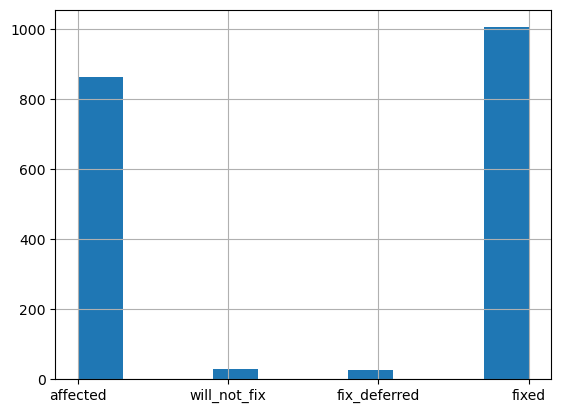

In [3]:
df['Status'].hist()

<Axes: >

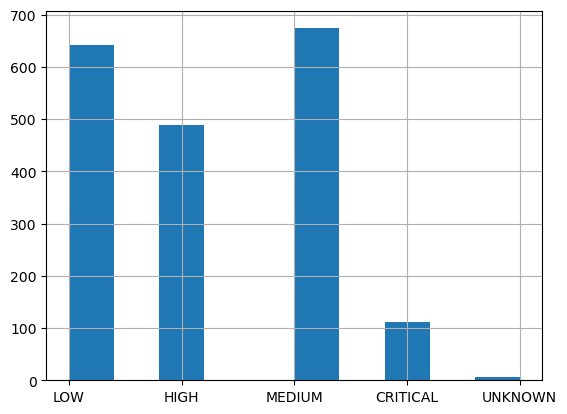

In [4]:
df['Severity'].hist()

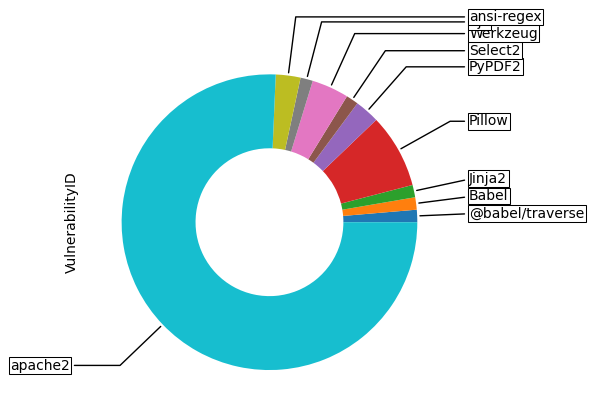

In [5]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

In [7]:
len(df.loc[df['Severity'] == "CRITICAL"])

112